In [2]:
# import numpy as np
# import pandas as pd
# import geopandas as gpd


# file = pd.ExcelFile('Wijkdata_Jeugdhulp_in_de_wijk.ods')

# sheet_names = file.sheet_names

# wijk = pd.read_excel(file, sheet_name=sheet_names[-3])  # wijk
# gebr = pd.read_excel(file, sheet_name=sheet_names[-2])  # gebruik
# det = pd.read_excel(file, sheet_name=sheet_names[-1])  # determinanten

# file.close()

# df = det.copy()
# # als je wijk en gemeentecode hebt heb je wijkcode en gemeentenaam niet nodig
# df = df.merge(wijk[['wijk', 'gemeentecode']], on='wijk', how='left')
# # per_jhzv : aandeel jeugdigen met jeugdhulp zonder verblijf, waargenomen -> target variable
# df = df.merge(gebr[['wijk', 'perc_jhzv']], on='wijk', how='left')

# for col in df.columns:
#     df[col] = df[col].apply(lambda x: x if x != '.' else np.nan)

# # TODO is nu missig values vullen met gemiddelde hoe willen we dat doen?
# df.fillna(df.mean(), inplace=True)

# # hun schatting root mean squared error (residu = schatting - waargenomen)
# for col in gebr.columns:
#     gebr[col] = gebr[col].apply(lambda x: x if x != '.' else np.nan)

# # drop missende schattingen en bereken RMSE
# original_rmse = str((gebr.dropna(subset='residu')['residu']**2).mean()**0.5)

# # buurt_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/buurt_2022_v1.shp')
# wijk_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/wijk_2022_v1.shp')
# # gemeente_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/gemeente_2022_v1.shp')

# print(wijk_geo.head())

In [99]:
import numpy as np
import pandas as pd
import geopandas as gpd


file = pd.ExcelFile('Wijkdata_Jeugdhulp_in_de_wijk.ods')

sheet_names = file.sheet_names

wijk = pd.read_excel(file, sheet_name=sheet_names[-3])  # wijk
gebr = pd.read_excel(file, sheet_name=sheet_names[-2])  # gebruik
det = pd.read_excel(file, sheet_name=sheet_names[-1])  # determinanten

file.close()

df = det.copy()
# als je wijk en gemeentecode hebt heb je wijkcode en gemeentenaam niet nodig
df = df.merge(wijk[['wijk', 'gemeentecode']], on='wijk', how='left')
# per_jhzv : aandeel jeugdigen met jeugdhulp zonder verblijf, waargenomen -> target variable
df = df.merge(gebr[['wijk', 'perc_jhzv']], on='wijk', how='left')

for col in df.columns:
    df[col] = df[col].apply(lambda x: x if x != '.' else np.nan)

# TODO is nu missig values vullen met gemiddelde hoe willen we dat doen?
df.fillna(df.mean(), inplace=True)

# hun schatting root mean squared error (residu = schatting - waargenomen)
for col in gebr.columns:
    gebr[col] = gebr[col].apply(lambda x: x if x != '.' else np.nan)

# drop missende schattingen en bereken RMSE
original_rmse = str((gebr.dropna(subset='residu')['residu']**2).mean()**0.5)

# buurt_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/buurt_2022_v1.shp')
wijk_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/wijk_2022_v1.shp')
# gemeente_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/gemeente_2022_v1.shp')

wijk_geo = gpd.read_file('./WijkBuurtkaart_2022_v1/wijk_2022_v1.shp')
wijk_geo['WK_CODE'] = wijk_geo['WK_CODE'].apply(lambda x: x[2:]).astype('float')
wijk_geo['GM_CODE'] = wijk_geo['GM_CODE'].apply(lambda x: x[2:]).astype('float')
wijk_final = df.merge(wijk_geo, left_on=['wijk', 'gemeentecode'], right_on=['WK_CODE', 'GM_CODE'], how='left')
for col in wijk_final.columns:
    wijk_final[col] = wijk_final[col].apply(lambda x: x if x != int(-99999999) else np.nan)

df = wijk_final.fillna(wijk_final.mean(numeric_only=True))
df = df.drop(['JRSTATCODE', 'JAAR', 'Shape_Leng', 'Shape_Area', 'geometry', 'wijk', 'WK_CODE', 'WK_NAAM', 'GM_CODE', 'GM_NAAM', 'gemeentecode', 'H2O'], axis=1)
df

C:\Users\SemKj\AppData\Local\Temp\ipykernel_4636\507486496.py:46: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = wijk_final.fillna(wijk_final.mean())


,perc_sbo_g,perc_vso_g,perc_praktijk_g,perc_hhmk,perc_jong04,perc_1ouder,perc_tienmam,perc_hhmkhgink,perc_kind_sch5,perc_ouderpsy,...,P_WEST_AL,P_N_W_AL,P_MAROKKO,P_ANT_ARU,P_SURINAM,P_TURKIJE,P_OVER_NW,OPP_TOT,OPP_LAND,OPP_WATER
0,0.7,0.6,1.0,23.646,30.840,24.27500,0.606,3.664000,5.869000,14.278,...,9.776373,9.212564,1.456822,0.642055,1.186097,1.574698,4.898964,1082.280806,1040.75158,41.516983
1,0.5,0.5,0.6,27.875,32.353,14.70600,0.615,4.657000,6.727000,15.600,...,9.776373,9.212564,1.456822,0.642055,1.186097,1.574698,4.898964,1082.280806,1040.75158,41.516983
2,0.5,0.9,1.3,20.911,27.822,18.89800,0.917,3.937000,5.646000,12.898,...,9.776373,9.212564,1.456822,0.642055,1.186097,1.574698,4.898964,1082.280806,1040.75158,41.516983
3,0.5,0.9,1.3,17.156,36.842,17.66441,0.917,11.859103,5.750111,12.415,...,9.776373,9.212564,1.456822,0.642055,1.186097,1.574698,4.898964,1082.280806,1040.75158,41.516983
4,0.5,0.9,1.3,20.957,29.620,17.12000,0.917,5.978000,6.317000,13.724,...,9.776373,9.212564,1.456822,0.642055,1.186097,1.574698,4.898964,1082.280806,1040.75158,41.516983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0.7,1.3,0.9,25.680,29.929,13.81800,0.283,6.663000,5.747000,13.100,...,6.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3207.000000,3175.00000,32.000000
2914,0.4,1.0,1.1,25.822,21.394,17.78800,0.275,4.808000,5.035000,13.097,...,9.776373,9.212564,1.456822,0.642055,1.186097,1.574698,4.898964,1082.280806,1040.75158,41.516983
2915,0.4,1.0,1.1,25.628,35.294,14.21600,0.275,5.392000,6.105000,17.588,...,9.776373,9.212564,1.456822,0.642055,1.186097,1.574698,4.898964,1082.280806,1040.75158,41.516983
2916,0.4,1.0,1.1,25.472,28.571,17.98900,0.275,5.291000,8.682000,17.385,...,9.776373,9.212564,1.456822,0.642055,1.186097,1.574698,4.898964,1082.280806,1040.75158,41.516983


In [88]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Assume you have your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost regressor
model = xgb.XGBRegressor()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
predictions = best_model.predict(X_test)

# Calculate the evaluation metric (e.g., mean squared error)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse**0.5)

Mean Squared Error: 6.885022454087877


Ensemble Model RMSE: 2.5835432462351395


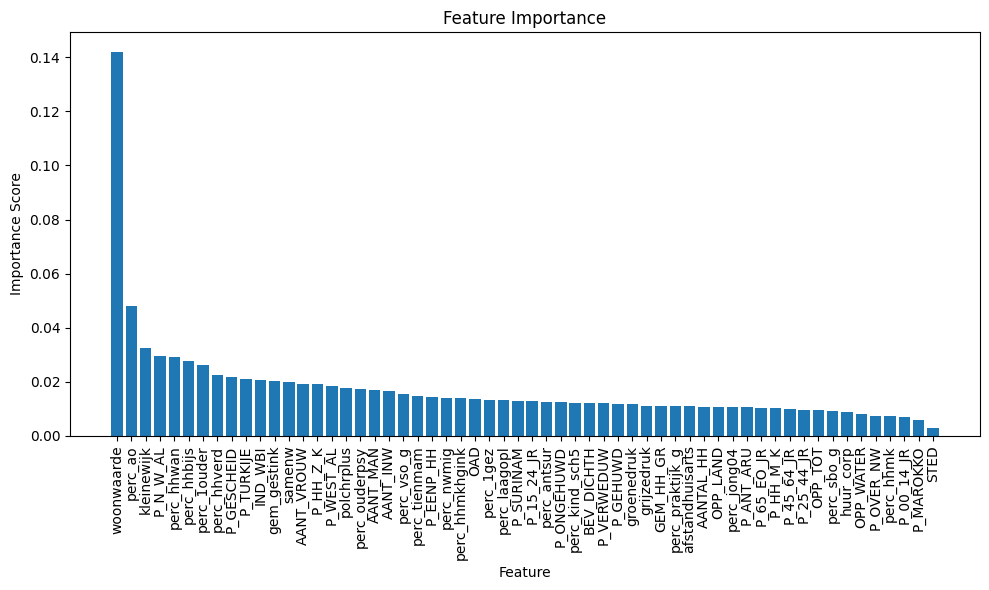

In [98]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = df.drop(['perc_jhzv'], axis=1)

y = df['perc_jhzv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params= {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': np.nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
# Step 2: Create the base model
base_model = XGBRegressor(**params)

# Step 3: Create the bagging ensemble model with the base model
bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)

# Step 4: Train the bagging ensemble model
bagging_model.fit(X_train, y_train)

# Step 5: Generate ensemble predictions on the test set
ensemble_predictions = bagging_model.predict(X_test)

# Step 6: Evaluate the ensemble performance
mse = mean_squared_error(y_test, ensemble_predictions)
print("Ensemble Model RMSE:", mse**0.5)
# Get the feature importances from the base estimators
importance_scores = np.mean([estimator.feature_importances_ for estimator in bagging_model.estimators_], axis=0)

# Get the feature names
feature_names = X_train.columns

# Sort feature importance scores and feature names in descending order
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance_scores)), sorted_importance_scores)
plt.xticks(range(len(sorted_importance_scores)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [79]:
# !pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))  # Output layer (no activation function for regression)

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, batch_size=25, epochs=25, verbose=1)

loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (RMSE) on test data: {loss**0.5}")

Epoch 1/25
94/94 [==============================] - 1s 2ms/step - loss: 40.3943
Epoch 2/25
94/94 [==============================] - 0s 2ms/step - loss: 12.1098
Epoch 3/25
94/94 [==============================] - 0s 1ms/step - loss: 9.5664
Epoch 4/25
94/94 [==============================] - 0s 1ms/step - loss: 8.3703
Epoch 5/25
94/94 [==============================] - 0s 1ms/step - loss: 7.6023
Epoch 6/25
94/94 [==============================] - 0s 1ms/step - loss: 7.1155
Epoch 7/25
94/94 [==============================] - 0s 1ms/step - loss: 6.7190
Epoch 8/25
94/94 [==============================] - 0s 1ms/step - loss: 6.3342
Epoch 9/25
94/94 [==============================] - 0s 2ms/step - loss: 6.1331
Epoch 10/25
94/94 [==============================] - 0s 2ms/step - loss: 5.9273
Epoch 11/25
94/94 [==============================] - 0s 2ms/step - loss: 5.6670
Epoch 12/25
94/94 [==============================] - 0s 1ms/step - loss: 5.4325
Epoch 13/25
94/94 [============================

In [93]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint

# Assume you have your data in X and y

# Define the XGBoost regressor
model = xgb.XGBRegressor()

# Define the hyperparameter grid for RandomizedSearchCV
{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5866823267538861,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 1.955303037866204,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.0646708263364187,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': np.nan,
 'monotone_constraints': None,
 'n_estimators': 101,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.8503117489824894,
 'reg_lambda': 0.41588332573637765,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.7838501639099957,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X, y)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the testing data using the best model
predictions = best_model.predict(X)

# Calculate the evaluation metric (e.g., mean squared error)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error:", mse**0.5)


Mean Squared Error: 1.357878498983587


In [94]:
best_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5866823267538861,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 1.955303037866204,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.0646708263364187,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 101,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.8503117489824894,
 'reg_lambda': 0.41588332573637765,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.7838501639099957,
 'tree_method': None,
 'validate_parameters': None,
 'verb

In [30]:
print(len(wijk_final))
print(len(wijk_final[wijk_final['wijk']]))

,wijk,wijknaam,gemeentecode,gemnaam_2017,WK_CODE,WK_NAAM,GM_CODE,GM_NAAM,IND_WBI,H2O,...,P_TURKIJE,P_OVER_NW,OPP_TOT,OPP_LAND,OPP_WATER,JRSTATCODE,JAAR,Shape_Leng,Shape_Area,geometry
0,300,Wijk 00,3,Appingedam,300.0,Wijk 00 Yerseke,GM0703,Reimerswaal,1.0,NEE,...,0.0,4.0,1373.0,1340.0,33.0,2022WK070300,2022.0,26116.690813,1.373328e+07,"POLYGON ((62508.170 389922.393, 62519.100 3899..."
1,300,Wijk 00,3,Appingedam,300.0,Wijk 00 Eijsden,GM1903,Eijsden-Margraten,1.0,NEE,...,0.0,3.0,1725.0,1604.0,121.0,2022WK190300,2022.0,23909.873885,1.725161e+07,"POLYGON ((176970.170 310405.660, 176954.470 31..."
2,500,Wijk 00,5,Bedum,500.0,Bemmel,GM1705,Lingewaard,3.0,NEE,...,0.0,2.0,1589.0,1430.0,159.0,2022WK170500,2022.0,26549.395986,1.589229e+07,"POLYGON ((191082.209 434865.765, 191086.621 43..."
3,700,Wijk 00 Bellingwolde,7,Bellingwedde,700.0,Wijk 00 Milsbeek,GM0907,Gennep,1.0,NEE,...,0.0,2.0,856.0,834.0,22.0,2022WK090700,2022.0,13562.339207,8.560097e+06,"POLYGON ((192752.744 416190.241, 192764.549 41..."
4,700,Wijk 00 Bellingwolde,7,Bellingwedde,700.0,Wijk 00 Griendtsveen,GM1507,Horst aan de Maas,1.0,NEE,...,0.0,2.0,981.0,899.0,82.0,2022WK150700,2022.0,12745.009143,9.810029e+06,"POLYGON ((189256.503 383688.114, 189173.815 38..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,195502,Wijk 02 Didam,1955,Montferland,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3190,198700,Wijk 00 Zuidbroek,1987,Menterwolde,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3191,198701,Wijk 01 Noordbroek,1987,Menterwolde,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3192,198702,Wijk 02,1987,Menterwolde,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [31]:
wijk

,wijk,wijknaam,gemeentecode,gemnaam_2017
0,300,Wijk 00,3,Appingedam
1,500,Wijk 00,5,Bedum
2,700,Wijk 00 Bellingwolde,7,Bellingwedde
3,701,Wijk 01 Oost,7,Bellingwedde
4,702,Wijk 02 Blijham,7,Bellingwedde
...,...,...,...,...
2913,195502,Wijk 02 Didam,1955,Montferland
2914,198700,Wijk 00 Zuidbroek,1987,Menterwolde
2915,198701,Wijk 01 Noordbroek,1987,Menterwolde
2916,198702,Wijk 02,1987,Menterwolde
